### Preprocessing and clustering for Apple Appstore apps

Continuing along with the theme of data cleaning and exploration, much of effective NLP analysis is dependent on the pre-processing of textual data. I have thus decided to perform a step by step preprocessing of some textual data derived from Apple Appstore descriptions and a K-Means cluster of the resulting text.

Why the Appstore? This dataset from kaggle contains 7197 apps with all their respective app descriptions. App descriptions are where app creators try their best to "sell" their app. With the preprocessed data, I examine the question of "Are App descriptions good predictors of the genre of the app?".

The preprocessing "framework" I use here is as follows:

1.Translations*
2.Remove non-alphabetic characters
3.Convert all to lower case
4.Tokenization
5.Remove stop words
6.Stemming**
7.Analysis

* I wanted to translate all the descriptions first as a regex for non-alphabetic characters would have removed languages like Japanese and Chinese.

** I had left out lemmatization in this particular case as I wanted to look at lexical diversity later.

As usual, we start off by reading in the csv files with the relevant data. Here, we merge the dataframe with basic app information with another dataframe with app descriptions.

In [ ]:
# !pip install markovify
# !pip install missingno

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import markovify
import missingno as msno
import nltk

In [2]:
gen_df = pd.read_csv(r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Text data analysis\Datasets\AppleStore.csv')
desc_df = pd.read_csv(r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Text data analysis\Datasets\appleStore_description.csv')

In [9]:
apps_df = pd.merge(gen_df, desc_df[['id','app_desc']], on='id', how='left')

In [ ]:
apps_df.head(30)

In [6]:
apps_df.shape

(11100, 18)

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


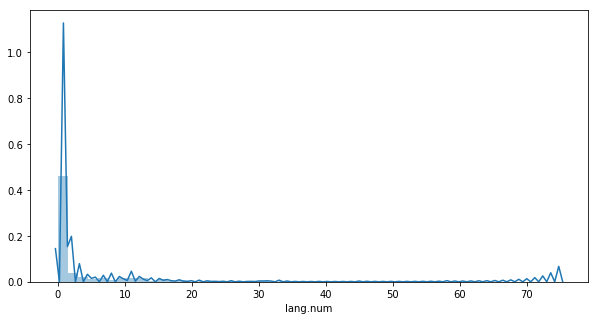

In [8]:
# distribution across languages

%matplotlib inline
plt.figure(figsize=(10,5))
ax = sb.distplot(apps_df['lang.num'])
plt.show()

In [483]:
apps_df.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
count,1.110000e+04,1.110000e+04,11100.000000,1.110000e+04,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.0
mean,9.196595e+08,1.291145e+08,1.119242,8.359482e+03,298.496486,2.286802,2.109550,24.576216,2.755225,3.875495,0.643874,0.0
std,2.575416e+08,3.044624e+08,4.768515,6.129530e+04,3164.394530,2.080899,2.129825,17.621606,2.056240,6.719282,0.478875,0.0
min,2.816565e+08,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,7.748118e+08,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0
50%,1.041344e+09,4.249093e+07,0.000000,2.000000e+01,1.000000,3.000000,2.000000,37.000000,2.000000,1.000000,1.000000,0.0
75%,1.106219e+09,1.246930e+08,0.990000,8.192500e+02,54.000000,4.500000,4.500000,38.000000,5.000000,2.000000,1.000000,0.0
max,1.188524e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000,0.0


In [ ]:
test = apps_df[0:50];test
# test.shape

In [8]:
test.prime_genre.unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       nan, 'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation'], dtype=object)

In [ ]:
# pd.set_option('display.max_colwidth', -1)  # to display the full content of the column

In [ ]:
chk = test[test['prime_genre']=='Sports']
print(chk.app_desc)

In [ ]:
for messages in chk.app_desc:
    print(messages)

In [20]:
# apps_df.groupby('prime_genre').get_group('Sports')
# sports_model = markovify.NewlineText(apps_df.groupby('prime_genre').get_group('Sports')['app_desc'], state_size = 2)

test.groupby('prime_genre').get_group('Sports')
sports_model = markovify.NewlineText(test.groupby('prime_genre').get_group('Sports')['app_desc'], state_size = 2)

In [ ]:
for i in range(10):
    print(sports_model.make_sentence())

In [16]:
# print(round(apps_df.prime_genre.value_counts(sort=True)/apps_df.prime_genre)*100,2))
print(round(apps_df.prime_genre.value_counts(sort=True)/apps_df['prime_genre'].count()*100,2))

Games                53.66
Entertainment         7.43
Education             6.29
Photo & Video         4.85
Utilities             3.45
Health & Fitness      2.50
Productivity          2.47
Social Networking     2.32
Lifestyle             2.00
Music                 1.92
Shopping              1.70
Sports                1.58
Book                  1.56
Finance               1.45
Travel                1.13
News                  1.04
Weather               1.00
Reference             0.89
Food & Drink          0.88
Business              0.79
Navigation            0.64
Medical               0.32
Catalogs              0.14
Name: prime_genre, dtype: float64


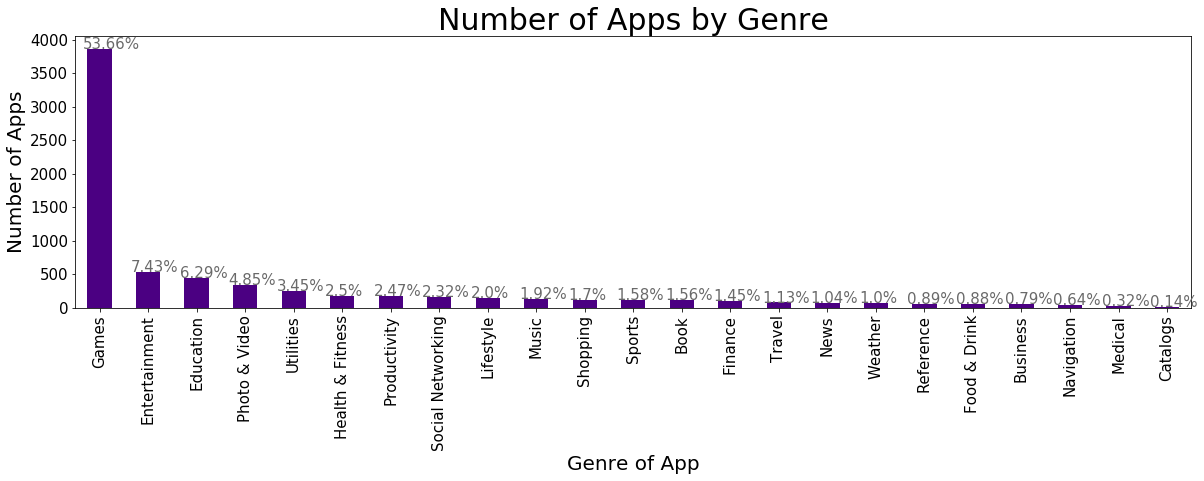

In [17]:
ax = apps_df['prime_genre'].value_counts().plot(kind='bar', figsize=(20,5),color="indigo", fontsize=15);
ax.set_title('Number of Apps by Genre', fontsize = 30)
ax.set_xlabel('Genre of App', fontsize = 20)
ax.set_ylabel('Number of Apps', fontsize = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

    # set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.1, i.get_height()+.1,str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

In [ ]:
ax = round(apps_df.groupby('prime_genre')['user_rating'].mean().nlargest(25),2)
ax = pd.DataFrame(ax);ax

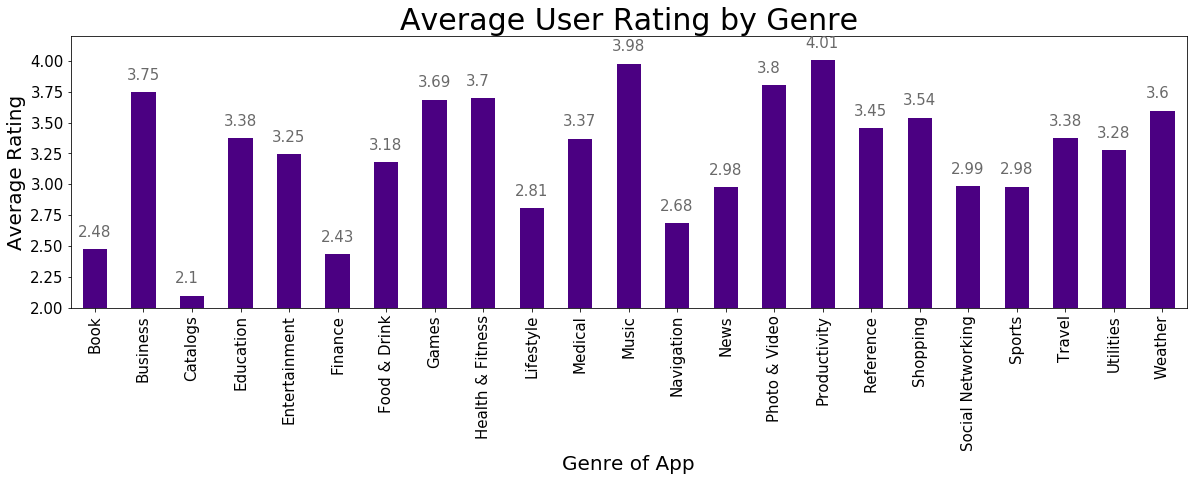

In [25]:
ax = apps_df.groupby('prime_genre')['user_rating'].mean().plot(kind='bar', figsize=(20,5), color = 'indigo',fontsize=15)
ax.set_title('Average User Rating by Genre', fontsize = 30)
ax.set_xlabel('Genre of App', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_ylim((2,4.2))

# create a list to collect the plt.patches data
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.1, i.get_height()+.1,str(round((i.get_height()), 2)), fontsize=15,color='dimgrey')    

#### Preprocessing process

In [71]:
# !pip install langdetect
# !pip install googletrans

In [10]:
# 1.Translating to English

from langdetect import detect
from googletrans import Translator

In [ ]:
for item,row in apps_df.head(2).iterrows():
    print("Item",item)
    print('*'*100)
    print("row",row)

In [22]:
print(apps_df.at[0,'user_rating'])

4.0


In [11]:
#missing data
data = apps_df
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)
data.shape

(11100, 18)

In [24]:
apps_df[apps_df['app_desc'].isnull()].head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab,app_desc
18,284971781,NaN,0,NaN,0.0,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0,NaN
25,286115722,NaN,0,NaN,0.0,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0,NaN
29,288091002,NaN,0,NaN,0.0,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0,NaN
37,289567151,NaN,0,NaN,0.0,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0,NaN
43,291676451,NaN,0,NaN,0.0,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0,NaN


In [12]:
#missing data
data = data.dropna()
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)
data.shape

(7197, 18)

In [13]:
apps_df = data

In [ ]:
apps_df.head(25)

In [ ]:
apps_df['desc_lang'] = ''

for item, row in apps_df.iterrows():
    apps_df.at[item,'desc_lang'] = detect(row['app_desc'])
    if detect(row['app_desc']) != 'en':
        try:
            translator = Translator()
            translated = translator.translate(row['app_desc']).text
            apps_df.at[item,'app_desc'] = translated
        except:
            print('ERRORERRORERROER',row['id'], row['track_name'])

In [14]:
error_apps = [356968629,379395415,395096736,413487517,447024088,481033328,481914139,491629188,594145971,621167809,622559167,
             660617252,794156760,820004378,862469459,894225691,895700579,915223450,923138396,933687137,938095479,953940121,
             958635569,966099615,975414811,977041956,982887800,985565530,1021368752,1039883456,1040048258,1040713617,1056011241,
             1057818838,1072278593,1078142098,1078542442,1078812538,1084253570,1087276648,1111428249,1114284578,1123417039,
             1179959829,1180931796,1181724803]

In [15]:
apps_df = apps_df[~apps_df['id'].isin(error_apps)]

In [16]:
apps_df.shape

(7151, 18)

In [ ]:
apps_df.head(25)

In [17]:
# 2. Removing non-alphabetic characters

import re
def cleaned(x):
    return re.sub(r'[^a-zA-z ]','',x)

apps_df['app_desc'] = apps_df['app_desc'].apply(cleaned)

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [ ]:
apps_df.head(25)

In [18]:
# 3. Convert to lower case

apps_df['app_desc'] = apps_df['app_desc'].str.lower()

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
apps_df.head(25)

In [19]:
# 4: Tokenization
# 5: Removing stop words
# 6. Stemming

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def wordfilter(string,filtwords):
    filtered=[]
    tokens=word_tokenize(string)
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

In [20]:
# import nltk
# nltk.download('punkt')

apps_df['filtered'] =''

for item,row in apps_df.iterrows():
    apps_df.at[item, 'filtered'] = wordfilter(row['app_desc'],stop_words)

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
apps_df.head(25)

In [45]:
apps_df['prime_genre'].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

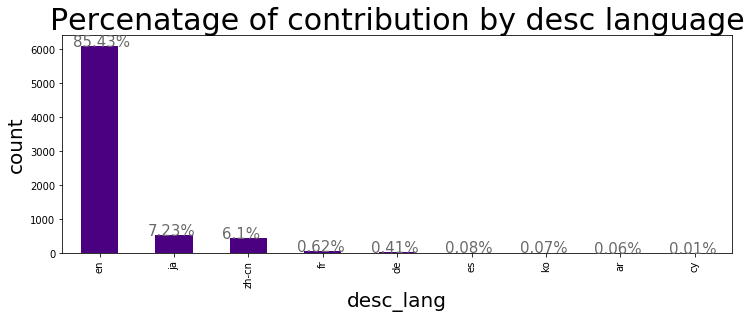

In [55]:
ax = apps_df['desc_lang'].value_counts().plot(kind='bar',figsize=(12,4),color='indigo')
ax.set_title('Percenatage of contribution by desc language', fontsize = 30)
ax.set_xlabel('desc_lang', fontsize = 20)
ax.set_ylabel('count', fontsize = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

    # set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.1, i.get_height()+.1,str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

In [ ]:
# 7. Analysis

# 7.1 word cloud generation

def get_group(df,column,label):
    return df.groupby(column).get_group(label)

def get_corpus(group):
    corpus =''
    for item, row in group.iterrows():
        line = (' ').join(row['filtered'])
        corpus = corpus + ' ' + line
    return corpus

genres = list(apps_df['prime_genre'].unique())
desc_lib = dict.fromkeys(genres)

for genre in genres:
    desc_lib[genre] = get_corpus(get_group(apps_df,'prime_genre',genre))

desc_lib['Games'[:10]]

In [22]:
# Breakup

apps_df.groupby('prime_genre').get_group('News')
# get_group(apps_df,'prime_genre',genre)

genres = list(apps_df['prime_genre'].unique());genres
desc_lib = dict.fromkeys(genres);desc_lib

test = apps_df.head(2);test
genres = list(test['prime_genre'].unique());genres
genres = genres[0:1];genres
desc_lib = dict.fromkeys(genres);desc_lib

for genre in genres:
    desc_lib[genre] = get_corpus(get_group(test,'prime_genre',genre))
    
desc_lib

# pd.set_option('display.max_colwidth', 50) # default
# # pd.set_option('display.max_colwidth', -1)

# test['filtered']

{'Games': ' save limit timeon popular video game arcad histori world video game hall fame inducteewho forget countless hour quarter spent outrun peski ghost chompin dot arcad excit mobil devic guid pacman maze easi swipe control mfi control kick old school onscreen joystickeat dot advanc next stage go high score higher level gain extra life point gobbl power pellet weaken ghost temporarili eat chang back avoid blinki leader ghost fellow ghost pinki inki clyde lose life game lose live new maze includedth game includ new maze addit pixel pixel recreat classic origin maze challeng skill beat constant updat game new maze pack buy complet pacman collectionhint tipsinsid protip hint made avail first time ingam use help becom pacman championfeatur new tournament new visual hint protip new maze new challeng play arcad perfect port classic pacman two differ control mode three game difficulti includ origin arcad game retina display support mfi control support'}

In [255]:
apps_df.shape

(7151, 19)

In [195]:
genres

['Games']

In [23]:
desc_lib

{'Games': ' save limit timeon popular video game arcad histori world video game hall fame inducteewho forget countless hour quarter spent outrun peski ghost chompin dot arcad excit mobil devic guid pacman maze easi swipe control mfi control kick old school onscreen joystickeat dot advanc next stage go high score higher level gain extra life point gobbl power pellet weaken ghost temporarili eat chang back avoid blinki leader ghost fellow ghost pinki inki clyde lose life game lose live new maze includedth game includ new maze addit pixel pixel recreat classic origin maze challeng skill beat constant updat game new maze pack buy complet pacman collectionhint tipsinsid protip hint made avail first time ingam use help becom pacman championfeatur new tournament new visual hint protip new maze new challeng play arcad perfect port classic pacman two differ control mode three game difficulti includ origin arcad game retina display support mfi control support'}

In [139]:
for x in desc_lib:
    print(x,len(desc_lib[x]))

Games 952


In [197]:
# Generating dictionary of corpus

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(min_df=0,stop_words='english',max_features=100)
genre_counts=dict.fromkeys(genres)
genre_words=dict.fromkeys(genres)

for genre in genres:
    genre_counts[genre] = cv.fit_transform([desc_lib[genre]]).toarray().ravel()
    genre_words[genre] = np.array(cv.get_feature_names())
    genre_counts[genre] = genre_counts[genre]/float(genre_counts[genre].max())
    genre_counts[genre]
    print(genre, genre_words[genre])

Games ['addit' 'advanc' 'arcad' 'avail' 'avoid' 'beat' 'becom' 'blinki' 'buy'
 'challeng' 'championfeatur' 'chang' 'chompin' 'classic' 'clyde'
 'collectionhint' 'complet' 'constant' 'control' 'countless' 'devic'
 'differ' 'difficulti' 'display' 'dot' 'easi' 'eat' 'excit' 'extra' 'fame'
 'fellow' 'forget' 'gain' 'game' 'ghost' 'gobbl' 'guid' 'hall' 'help'
 'high' 'higher' 'hint' 'histori' 'hour' 'includ' 'includedth'
 'inducteewho' 'ingam' 'inki' 'joystickeat' 'kick' 'leader' 'level' 'life'
 'limit' 'live' 'lose' 'maze' 'mfi' 'mobil' 'mode' 'new' 'old' 'onscreen'
 'origin' 'outrun' 'pack' 'pacman' 'pellet' 'perfect' 'peski' 'pinki'
 'pixel' 'play' 'point' 'popular' 'port' 'power' 'protip' 'quarter'
 'recreat' 'retina' 'save' 'school' 'score' 'skill' 'spent' 'stage'
 'support' 'swipe' 'temporarili' 'time' 'timeon' 'tipsinsid' 'tournament'
 'updat' 'use' 'video' 'visual' 'weaken']


In [198]:
genre_counts

{'Games': array([0.14285714, 0.14285714, 0.57142857, 0.14285714, 0.14285714,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.28571429,
        0.14285714, 0.14285714, 0.14285714, 0.28571429, 0.14285714,
        0.14285714, 0.14285714, 0.14285714, 0.57142857, 0.14285714,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.28571429,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714, 0.14285714, 1.        , 0.57142857,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.28571429, 0.14285714, 0.14285714, 0.28571429,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714, 0.14285714, 0.28571429, 0.14285714,
        0.14285714, 0.28571429, 0.85714286, 0.28571429, 0.14285714,
        0.14285714, 1.        , 0.14285714, 0.14285714, 0.28571429,
        0.14285714, 0.14285714, 0.57142857, 0.14285714, 0.14285714,
        0.14285714, 0.14285714, 0.28571

In [159]:
print(cv.get_feature_names())

['addit', 'advanc', 'arcad', 'avail', 'avoid', 'beat', 'becom', 'blinki', 'buy', 'challeng', 'championfeatur', 'chang', 'chompin', 'classic', 'clyde', 'collectionhint', 'complet', 'constant', 'control', 'countless', 'devic', 'differ', 'difficulti', 'display', 'dot', 'easi', 'eat', 'excit', 'extra', 'fame', 'fellow', 'forget', 'gain', 'game', 'ghost', 'gobbl', 'guid', 'hall', 'help', 'high', 'higher', 'hint', 'histori', 'hour', 'includ', 'includedth', 'inducteewho', 'ingam', 'inki', 'joystickeat', 'kick', 'leader', 'level', 'life', 'limit', 'live', 'lose', 'maze', 'mfi', 'mobil', 'mode', 'new', 'old', 'onscreen', 'origin', 'outrun', 'pack', 'pacman', 'pellet', 'perfect', 'peski', 'pinki', 'pixel', 'play', 'point', 'popular', 'port', 'power', 'protip', 'quarter', 'recreat', 'retina', 'save', 'school', 'score', 'skill', 'spent', 'stage', 'support', 'swipe', 'temporarili', 'time', 'timeon', 'tipsinsid', 'tournament', 'updat', 'use', 'video', 'visual', 'weaken']


Wordcloud for genre: Games


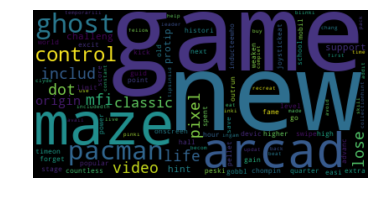

In [160]:
# pd.set_option('display.max_colwidth', 500) # default
# pd.set_option('display.max_rows', 5000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# pd.reset_option('max_rows')
# pd.reset_option('max_columns')
# pd.reset_option('max_colwidth')
# pd.reset_option('width')

from wordcloud import WordCloud
for genre in genres:
    print('Wordcloud for genre: ' + genre)
    wordcloud = WordCloud().generate(desc_lib[genre])
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

##### 7.2 Lexical diversity

In [260]:
apps_df = apps_df.drop(['lex_score','sentiment'],axis=1)

In [ ]:
apps_df.columns

In [ ]:
apps_df['lex_score'] = ''
apps_df['sentiment'] =''    

In [ ]:
apps_df.columns

In [ ]:
apps_df.dtypes

In [ ]:
for item,rows in apps_df.iterrows():
    apps_df.at[item,'lex_score'] = float(len(set(row['filtered']))*1.0/len(row['filtered'])*1.0)
#     apps_df.at[item, 'lex_score'] = float(len(set(row['filtered']))/len(row['filtered']))
# apps_df['lex_score'] = apps_df['lex_score'].astype(float)
# apps_df.dtypes

In [ ]:
test= apps_df[:15];test

In [ ]:
for item,rows in test.iterrows():
    print(item)
    print(rows)
    print(float(len(set(row['filtered']))))
    print('*'*122)

In [ ]:
apps_df.head(25)

In [ ]:
lex_means = apps_df.groupby('prime_genre')['lex_score'].mean()
lex_means

plt.figure(figsize = (30,10))
ax = sb.barplot(x = lex_means.index, y = lex_means.values)
ax.set_ylim(lex_means.values.min() - 0.025,0.8)
ax.set_title('Average Lexical Diversity Scores Across Genres', fontsize = 30)
ax.set_ylabel('Lexical Diversity Score', fontsize = 20)
ax.set_xlabel('Genre of App', fontsize = 20)

for p, label in zip(ax.patches, lex_means.values):
    ax.annotate(("%.2f" % round(label,2)), (p.get_x()+0.15, p.get_height()+0.005), fontsize = 15)

##### 7.3 Sentiment analysis

In [190]:
# df.drop(['B', 'C'], axis=1)

apps_df = apps_df.drop(['sentiment'], axis=1)

In [ ]:
apps_df.head(25)

In [178]:
# apps_df['sentiment'] = ''

In [ ]:
apps_df.dtypes

In [30]:
# !pip install textblob

from textblob import TextBlob
for item, row in apps_df.iterrows():
    blob = TextBlob(row['app_desc'])
    pol = blob.sentiment.polarity
#     apps_df.at['item', 'sentiment'] = pol
    apps_df.at['item', 'sentiment'] = float(pol)

C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:2584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value


In [ ]:
apps_df.head(25)

In [ ]:
apps_df['sentiment'] = apps_df['sentiment'].astype(float)

https://towardsdatascience.com/what-app-descriptions-tell-us-text-data-preprocessing-in-python-afc7ed88360d